# Notebook useful to summarize some general results in tables and plots

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np

In [3]:
import plotly.plotly
import plotly.tools as tls
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from Utils import TransantiagoConstants

In [5]:
DTPMDir = TransantiagoConstants.DTPMDir
DTPM_TRXDir = TransantiagoConstants.DTPM_TRXDir

In [6]:
daily_input_path = os.path.join(DTPM_TRXDir,'3_DAILY/daily_summary.csv')
daily_trx = pd.read_csv(daily_input_path,sep=';',encoding='latin-1', index_col=0)

* Creating new dependent and independent variables

In [7]:
daily_trx.loc[:,'TOTAL_trx'] = daily_trx.loc[:,'pn_SUM_TRX_no_t'] + daily_trx.loc[:,'pn_SUM_TRX_3t'] + daily_trx.loc[:,'pn_SUM_TRX_tm'] + daily_trx.loc[:,'zp_SUM_TRX']

In [8]:
independent_variables_path = os.path.join(DTPM_TRXDir,'0_INDEPENDENTS/independents_variables.csv')
independent_variables = pd.read_csv(independent_variables_path,sep=';',encoding='latin-1', index_col=0, parse_dates=[1])

In [9]:
independent_variables.loc[:,'Verano'] =  independent_variables.loc[:,'Enero'] + independent_variables.loc[:,'Febrero']
independent_variables.loc[:,'Nov_Dic_2017'] = independent_variables.loc[:,'Nov_2017'] + independent_variables.loc[:,'Dic_2017']
independent_variables.loc[:,'WEEK_OF_YEAR'] = independent_variables.loc[:,'DATE'].apply(lambda x: x.week)
independent_variables = pd.get_dummies(independent_variables, columns=['WEEK_OF_YEAR'])

In [10]:
complete_db = daily_trx.merge(independent_variables, on =['YEAR','MONTH','YEAR_DAY'], how='left')

In [11]:
complete_db.sort_values(by=['YEAR','MONTH','YEAR_DAY'], ascending=[True,True,True], inplace=True)

* Descriptives: General

In [12]:
descriptives = pd.DataFrame()

In [13]:
descriptives = complete_db.loc[:,'TOTAL_trx'].describe().to_frame('total_trx')
descriptives = pd.concat([descriptives, complete_db.loc[:,'pn_SUM_TRX_no_t'].describe().to_frame()], axis=1, join='inner')
descriptives = pd.concat([descriptives, complete_db.loc[:,'pn_SUM_TRX_3t'].describe().to_frame()], axis=1, join='inner')
descriptives = pd.concat([descriptives, complete_db.loc[:,'pn_SUM_TRX_tm'].describe().to_frame()], axis=1, join='inner')
descriptives = pd.concat([descriptives, complete_db.loc[:,'zp_SUM_TRX'].describe().to_frame()], axis=1, join='inner')

In [14]:
descriptives

total_trx  pn_SUM_TRX_no_t  pn_SUM_TRX_3t  pn_SUM_TRX_tm  \
count  1.096000e+03     1.096000e+03    1096.000000    1096.000000   
mean   2.416262e+06     1.675027e+06  342207.135036  138388.566606   
std    8.398716e+05     5.751708e+05  109530.562299  229832.148323   
min    4.875170e+05     3.253820e+05   80576.000000       0.000000   
25%    1.669855e+06     1.250662e+06  263248.500000    4255.500000   
50%    2.873835e+06     1.781616e+06  360663.500000   26267.500000   
75%    3.084350e+06     2.177554e+06  435838.000000  150627.000000   
max    3.364692e+06     2.472601e+06  510018.000000  861918.000000   

          zp_SUM_TRX  
count    1096.000000  
mean   260639.020073  
std    164090.711388  
min      3202.000000  
25%     41215.250000  
50%    343826.500000  
75%    384499.250000  
max    477827.000000

* Descriptives: Only working days during normal period

In [15]:
working_complete_db = complete_db.loc[((complete_db['SATURDAY']==0)
                                    &(complete_db['SUNDAY']==0)
                                    &(complete_db['Feriado_laboral']==0)
                                    &(complete_db['WEEK_OF_YEAR_52']==0)
                                    &(complete_db['WEEK_OF_YEAR_53']==0)
                                    &(complete_db['WEEK_OF_YEAR_1']==0)
                                    &(complete_db['WEEK_OF_YEAR_2']==0)
                                    &(complete_db['WEEK_OF_YEAR_3']==0)
                                    &(complete_db['WEEK_OF_YEAR_4']==0)
                                    &(complete_db['WEEK_OF_YEAR_5']==0)
                                    &(complete_db['WEEK_OF_YEAR_6']==0)
                                    &(complete_db['WEEK_OF_YEAR_7']==0)
                                    &(complete_db['WEEK_OF_YEAR_8']==0)
                                    &(complete_db['WEEK_OF_YEAR_9']==0)),:]

In [16]:
descriptives_working = pd.DataFrame()

In [17]:
descriptives_working = working_complete_db.loc[:,'TOTAL_trx'].describe().to_frame('total_trx')

descriptives_working = pd.concat([descriptives_working, working_complete_db.loc[:,'pn_SUM_TRX_no_t'].describe().to_frame()], axis=1, join='inner')

descriptives_working = pd.concat([descriptives_working, working_complete_db.loc[:,'pn_SUM_TRX_3t'].describe().to_frame()], axis=1, join='inner')

descriptives_working = pd.concat([descriptives_working, working_complete_db.loc[:,'pn_SUM_TRX_tm'].describe().to_frame()], axis=1, join='inner')

descriptives_working = pd.concat([descriptives_working, working_complete_db.loc[:,'zp_SUM_TRX'].describe().to_frame()], axis=1, join='inner')

In [18]:
descriptives_working

total_trx  pn_SUM_TRX_no_t  pn_SUM_TRX_3t  pn_SUM_TRX_tm  \
count  5.980000e+02     5.980000e+02     598.000000     598.000000   
mean   3.050910e+06     2.061060e+06  416586.122074  188869.362876   
std    1.655460e+05     2.867322e+05   52153.201410  273384.121941   
min    2.051727e+06     1.380106e+06  289598.000000       0.000000   
25%    2.976764e+06     1.864621e+06  373921.000000    5241.250000   
50%    3.065422e+06     2.142708e+06  429846.000000   35148.500000   
75%    3.158914e+06     2.286980e+06  455711.500000  291157.750000   
max    3.364692e+06     2.472601e+06  510018.000000  861918.000000   

          zp_SUM_TRX  
count     598.000000  
mean   384394.530100  
std     37898.044155  
min    212077.000000  
25%    364221.000000  
50%    381429.500000  
75%    400601.000000  
max    477827.000000

* Plotting general descriptives

In [19]:
general_trx_db = complete_db.loc[:,['TOTAL_trx','pn_SUM_TRX_no_t','pn_SUM_TRX_3t','pn_SUM_TRX_tm','zp_SUM_TRX']]
general_trx_db.rename(columns={"TOTAL_trx": "Total", "pn_SUM_TRX_no_t": "S/T", "pn_SUM_TRX_3t":"T/3B", "pn_SUM_TRX_tm":"T/M", "zp_SUM_TRX": "ZP"}, inplace=True)
stacked_general = general_trx_db.stack().to_frame('Transacciones').reset_index().rename(columns={'level_1':'Condición'})

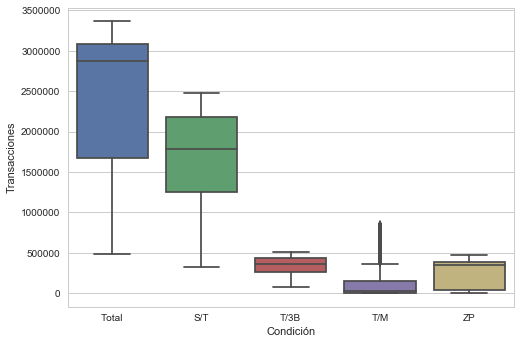

In [20]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=stacked_general.loc[:,'Condición'], y=stacked_general.loc[:,'Transacciones'])
plt.show()

* Plotting working-days descriptives

In [21]:
working_trx_db = working_complete_db.loc[:,['TOTAL_trx','pn_SUM_TRX_no_t','pn_SUM_TRX_3t','pn_SUM_TRX_tm','zp_SUM_TRX']]
working_trx_db.rename(columns={"TOTAL_trx": "Total", "pn_SUM_TRX_no_t": "S/T", "pn_SUM_TRX_3t":"T/3B", "pn_SUM_TRX_tm":"T/M", "zp_SUM_TRX": "ZP"}, inplace=True)
stacked_working = working_trx_db.stack().to_frame('Transacciones').reset_index().rename(columns={'level_1':'Condición'})

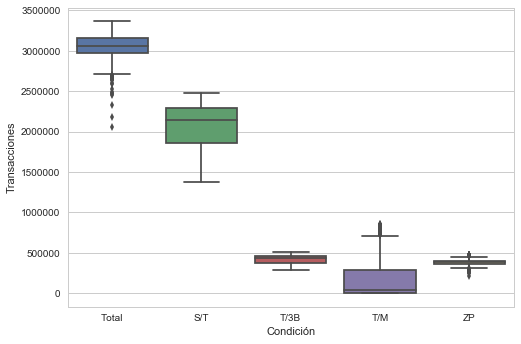

In [22]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=stacked_working.loc[:,'Condición'], y=stacked_working.loc[:,'Transacciones'])
plt.show()

* Descriptives of Expediciones: General

In [23]:
complete_db.loc[:,'total_exp'] = complete_db.loc[:,'pn_SUM_EXP_no_t'] + complete_db.loc[:,'pn_SUM_EXP_3t'] + complete_db.loc[:,'pn_SUM_EXP_tm']

In [24]:
descriptives = pd.concat([descriptives, complete_db.loc[:,'total_exp'].describe().to_frame()], axis=1, join='inner')

In [25]:
descriptives

total_trx  pn_SUM_TRX_no_t  pn_SUM_TRX_3t  pn_SUM_TRX_tm  \
count  1.096000e+03     1.096000e+03    1096.000000    1096.000000   
mean   2.416262e+06     1.675027e+06  342207.135036  138388.566606   
std    8.398716e+05     5.751708e+05  109530.562299  229832.148323   
min    4.875170e+05     3.253820e+05   80576.000000       0.000000   
25%    1.669855e+06     1.250662e+06  263248.500000    4255.500000   
50%    2.873835e+06     1.781616e+06  360663.500000   26267.500000   
75%    3.084350e+06     2.177554e+06  435838.000000  150627.000000   
max    3.364692e+06     2.472601e+06  510018.000000  861918.000000   

          zp_SUM_TRX     total_exp  
count    1096.000000   1096.000000  
mean   260639.020073  64168.876825  
std    164090.711388  10631.302127  
min      3202.000000  33326.000000  
25%     41215.250000  55906.500000  
50%    343826.500000  69911.000000  
75%    384499.250000  72272.000000  
max    477827.000000  76596.000000

* Descriptives of Expediciones: Working

In [26]:
working_complete_db.loc[:,'total_exp'] = working_complete_db.loc[:,'pn_SUM_EXP_no_t'] + working_complete_db.loc[:,'pn_SUM_EXP_3t'] + working_complete_db.loc[:,'pn_SUM_EXP_tm']

C:\Users\leoca_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\leoca_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
descriptives_working = pd.concat([descriptives_working, working_complete_db.loc[:,'total_exp'].describe().to_frame()], axis=1, join='inner')

In [28]:
descriptives_working

total_trx  pn_SUM_TRX_no_t  pn_SUM_TRX_3t  pn_SUM_TRX_tm  \
count  5.980000e+02     5.980000e+02     598.000000     598.000000   
mean   3.050910e+06     2.061060e+06  416586.122074  188869.362876   
std    1.655460e+05     2.867322e+05   52153.201410  273384.121941   
min    2.051727e+06     1.380106e+06  289598.000000       0.000000   
25%    2.976764e+06     1.864621e+06  373921.000000    5241.250000   
50%    3.065422e+06     2.142708e+06  429846.000000   35148.500000   
75%    3.158914e+06     2.286980e+06  455711.500000  291157.750000   
max    3.364692e+06     2.472601e+06  510018.000000  861918.000000   

          zp_SUM_TRX     total_exp  
count     598.000000    598.000000  
mean   384394.530100  72048.812709  
std     37898.044155   1946.047952  
min    212077.000000  63410.000000  
25%    364221.000000  70993.000000  
50%    381429.500000  72072.000000  
75%    400601.000000  73464.750000  
max    477827.000000  76596.000000

In [ ]:
trace1 = go.Scatter(x=working_complete_db.loc[:,'DATE'], y=working_complete_db.loc[:,'total_exp'], name='Expediciones', marker=dict(color='rgb(76, 181, 245)'),opacity=1)
data = [trace1]
layout = go.Layout(title='Expediciones diarias',  yaxis=dict(title='Expediciones'))

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='expediciones_working.html')